In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from uncertainties import ufloat,unumpy

%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [3]:
df1 = pd.read_csv('dados.csv')
df2 = pd.read_csv('dados2.csv')
df3 = pd.read_csv('dados3.csv')
df4 = pd.read_csv('dados4.csv')

In [4]:
# massas iniciais
m01 = 31.65
m02 = 31.64
m03 = 36.31
m04 = 38.17

In [5]:
# Comprimentos 
L = ufloat(12.50,0.05) 
L1 = ufloat(25.00,0.05)
L2 = ufloat(50.00,0.05)
L3 = ufloat(100.00,0.10)

# Calculo das retas  

In [6]:
def reta(x,m,b):
    return m*x + b

In [7]:
df1.head()

,M(g),dM(g),i(A),di(A)
0,31.65,0.03,0.3,0.05
1,31.70,0.03,0.6,0.05
2,31.75,0.03,0.9,0.05
3,31.77,0.03,1.2,0.05
4,31.81,0.03,1.5,0.05


In [8]:
slope, intercept, r, p, se = linregress(df1['i(A)'], df1['M(g)'])
slope1, intercept1, r1, p1, se1 = linregress(df2['i(A)'], df2['M(g)'])
slope2, intercept2, r2, p2, se2 = linregress(df3['i(A)'], df3['M(g)'])
slope3, intercept3, r3, p3, se3 = linregress(df4['i(A)'], df4['M(g)'])

In [9]:
print('Valor da inclinação da reta 1 = ', np.round(slope ,2))
print('Valor da inclinação da reta 2 = ', np.round(slope1,2))
print('Valor da inclinação da reta 3 = ', np.round(slope2,2))
print('Valor da inclinação da reta 4 = ', np.round(slope3,2))

Valor da inclinação da reta 1 =  0.11
Valor da inclinação da reta 2 =  0.21
Valor da inclinação da reta 3 =  0.42
Valor da inclinação da reta 4 =  0.83


In [10]:
x = reta(df1['i(A)'], slope, intercept)
x1 = reta(df2['i(A)'], slope1, intercept1)
x2 = reta(df3['i(A)'], slope2, intercept2)
x3 = reta(df4['i(A)'], slope3, intercept3)

# Calculo do Campo

### Equação 

$m = m_0 + \frac{L B}{g}$

$B = \frac{\alpha g}{L} $

In [11]:
g = 9.87
slope_teste  =  ufloat(np.round(slope, 2), 0.02)
slope_teste1 =  ufloat(np.round(slope1,2), 0.02)
slope_teste2 =  ufloat(np.round(slope2,2), 0.02)
slope_teste3 =  ufloat(np.round(slope3,2), 0.02)

B = (slope_teste * g)/L
B1 = (slope_teste1 * g)/L1
B2 = (slope_teste2 * g)/L2
B3 = (slope_teste3 * g)/L3



#print(slope_teste)
#print(slope_teste1)
#print(slope_teste2)
#print(slope_teste3)
print('B1 = ', B  )
print('B2 = ', B1 )
print('B3 = ', B2 )
print('B4 = ', B3 )

campo= 0.08/(25 * 10**(-6))
print("O campo calculado é " ,campo, " vezes maior que o da terra!")

B1 =  0.087+/-0.016
B2 =  0.083+/-0.008
B3 =  0.083+/-0.004
B4 =  0.0819+/-0.0020
O campo calculado é  3200.0000000000005  vezes maior que o da terra!


# Plot das retas

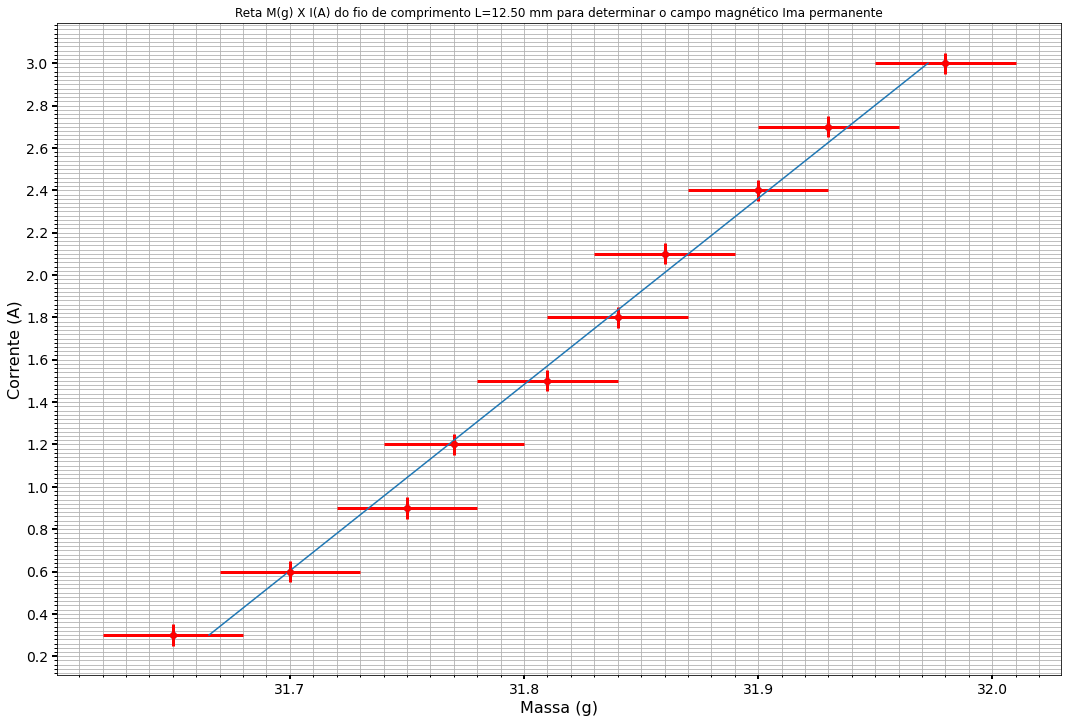

In [12]:
# Gráfico 1
fig, ax = plt.subplots(figsize=(18,12))

#plt.plot(df['I(ma)'],df['V(V)'])
plt.errorbar(df1['M(g)'], df1['i(A)'], xerr=df1['dM(g)'],yerr=df1['di(A)'], fmt='o', elinewidth=3, color='red')

plt.plot(x, df1['i(A)'])
plt.scatter(df1['M(g)'], df1['i(A)'])


plt.ylabel('Corrente (A)',fontsize=16)
plt.xlabel('Massa (g)', fontsize=16)

#Título:
plt.title('Reta M(g) X I(A) do fio de comprimento L=12.50 mm para determinar o campo magnético Ima permanente')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#plt.ylim(-5,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
#plt.xlim([-0.1,1.2])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')

plt.grid(which='both')
# plt.grid()
plt.savefig('fio12.pdf', dpi=1200)

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(18,12))


plt.plot(x1, df2['i(A)'])
plt.errorbar(df2['M(g)'], df2['i(A)'], xerr=df2['dM(g)'], yerr = df2['di(A)'], fmt='o', elinewidth=3, color='red')

plt.ylabel('Corrente (A)',fontsize=16)
plt.xlabel('Massa (g)', fontsize=16)

#Título:
plt.title('Reta M(g) X I(A) do fio de comprimento L=25.00 mm para determinar o campo magnético Ima permanente')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#plt.ylim(-5,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
#plt.xlim([-0.1,1.2])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')

plt.grid(which='both')
# plt.grid()
plt.savefig('fio25.pdf', dpi=1200)

plt.show()


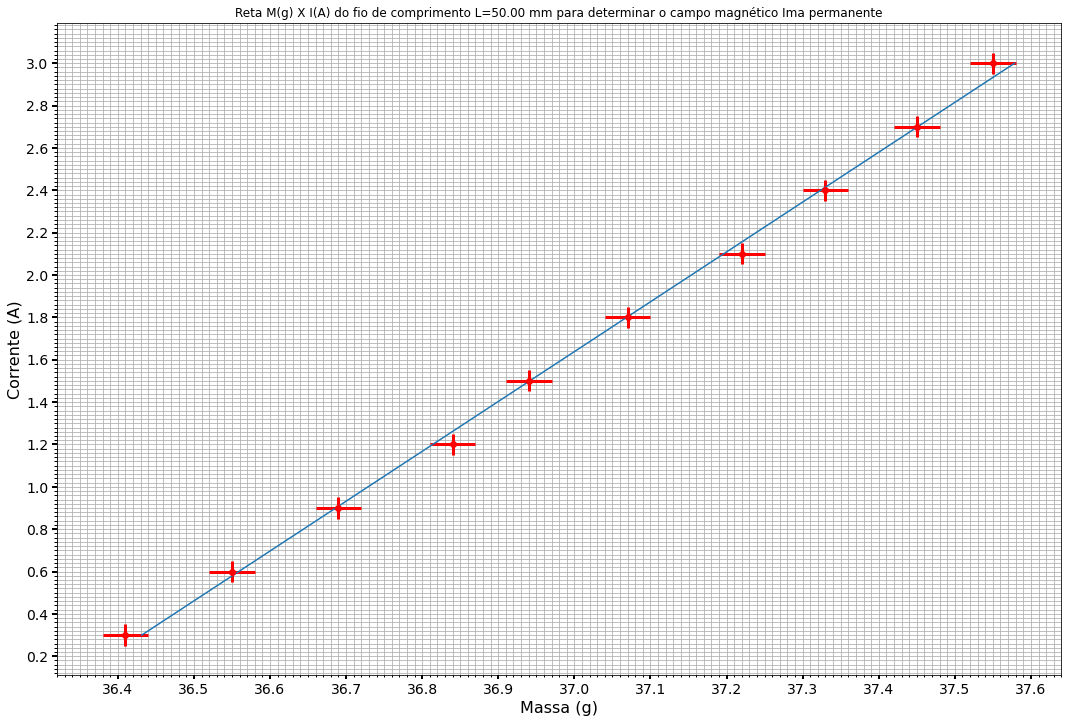

In [13]:
fig, ax = plt.subplots(figsize=(18,12))


plt.plot(x2, df3['i(A)'])
plt.errorbar(df3['M(g)'], df3['i(A)'], xerr=df3['dM(g)'], yerr = df3['di(A)'], fmt='o', elinewidth=3, color='red')

plt.ylabel('Corrente (A)',fontsize=16)
plt.xlabel('Massa (g)', fontsize=16)

#Título:
#plt.title('Gráfico da resistência para o diodo')
plt.title('Reta M(g) X I(A) do fio de comprimento L=50.00 mm para determinar o campo magnético Ima permanente')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#plt.ylim(-5,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
#plt.xlim([-0.1,1.2])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')

plt.grid(which='both')
# plt.grid()
plt.savefig('fio50.pdf', dpi=1200)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))


plt.plot(x3, df4['i(A)'])
plt.errorbar(df4['M(g)'], df4['i(A)'], xerr=df4['dM(g)'], yerr = df4['di(A)'], fmt='o', elinewidth=3, color='red')

plt.ylabel('Corrente (A)',fontsize=16)
plt.xlabel('Massa (g)', fontsize=16)

#Título:
#plt.title('Gráfico da resistência para o diodo')
plt.title('Reta M(g) X I(A) do fio de comprimento L=100.00 mm para determinar o campo magnético Ima permanente')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#plt.ylim(-5,1)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
#plt.xlim([-0.1,1.2])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')

plt.grid(which='both')
# plt.grid()
plt.savefig('fio100.pdf', dpi=1200)

plt.show()